In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import dill as pickle
def load_model(filename):
    with open(filename, 'rb') as f:
        model = pickle.load(f)
    return model

In [2]:
model = load_model(f'saved_model_{0}.pkl')

In [3]:
model_vars = model.datacollector.get_model_vars_dataframe()

<Axes: >

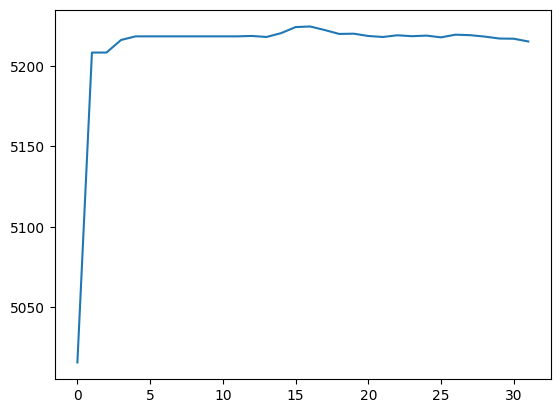

In [5]:
model_vars['HH consumption'].plot()

### PLOTTING FUNCTIONS

In [2]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_per_agent_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [3]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

,n_agents,n_households,n_cap_firms,n_cons_firms,n_serv_firms,HH consumption,Regional demand,Export demand,Bailout cost,New firms resources,Unemployment rate,Min wage,Avg wage
0,5626,5000,125,200,300,5015.934783,5015.934,752.390,0.0000,0,0.88,1.000,1.03
1,5626,5000,125,200,300,5217.658783,5217.659,782.649,0.0000,0,0.04,1.000,1.05
2,5626,5000,125,200,300,5217.658783,5217.659,782.649,0.0000,0,0.04,1.000,1.05
3,5626,5000,125,200,300,5226.135783,5226.136,783.920,0.0000,0,0.01,1.000,1.05
4,5626,5000,125,200,300,5228.330783,5228.331,784.250,0.0000,0,0.00,1.000,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5379,5000,56,109,213,5238.044671,5322.829,2845936.720,-16.7786,0,0.00,0.525,1.05
96,5377,5000,56,108,212,5239.849571,5223.071,3130530.391,193.8302,0,0.00,0.525,1.05
97,5375,5000,56,107,211,5240.869505,5434.700,3443583.430,148.7746,0,0.00,0.525,1.05
98,5373,5000,56,106,210,5235.318296,5384.093,3787941.774,283.6852,0,0.00,0.525,1.05


#### Agent variables

In [4]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_40.csv
agent_vars_20.csv
agent_vars_10.csv
agent_vars_30.csv
agent_vars_0.csv
agent_vars_50.csv
agent_vars_80.csv
agent_vars_90.csv
agent_vars_70.csv
agent_vars_60.csv


,Step,AgentID,Type,Price,Market share,Prod,Real demand,Wage,Net worth,Size,Labor demand
0,1,1,<class 'CRAB_agents.CapitalFirm'>,1.302,0.008,1.034671,0.0,1.036495,150.0,1.0,0.0
1,1,2,<class 'CRAB_agents.CapitalFirm'>,1.339,0.008,1.002116,0.0,1.031863,150.0,1.0,0.0
2,1,3,<class 'CRAB_agents.CapitalFirm'>,1.297,0.008,1.021583,0.0,1.019006,150.0,1.0,0.0
3,1,4,<class 'CRAB_agents.CapitalFirm'>,1.296,0.008,1.014616,0.0,1.011364,150.0,1.0,0.0
4,1,5,<class 'CRAB_agents.CapitalFirm'>,1.329,0.008,1.008145,0.0,1.030595,150.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
551426,100,5622,<class 'CRAB_agents.Household'>,NaN,NaN,NaN,NaN,1.045000,0.0,NaN,NaN
551427,100,5623,<class 'CRAB_agents.Household'>,NaN,NaN,NaN,NaN,1.075000,0.0,NaN,NaN
551428,100,5624,<class 'CRAB_agents.Household'>,NaN,NaN,NaN,NaN,1.028000,0.0,NaN,NaN
551429,100,5625,<class 'CRAB_agents.Household'>,NaN,NaN,NaN,NaN,1.007409,0.0,NaN,NaN


### SANITY CHECKS

#### N FIRMS

In [5]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "n_cap_firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "n_cons_firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "n_serv_firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

#### CONSUMPTION AND DEMAND

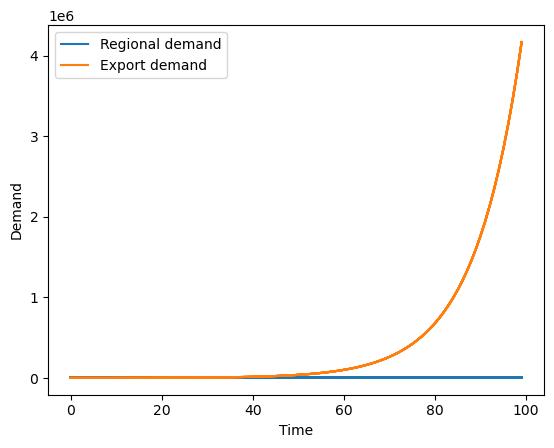

In [6]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")

plt.ylabel("Demand")
plt.show()

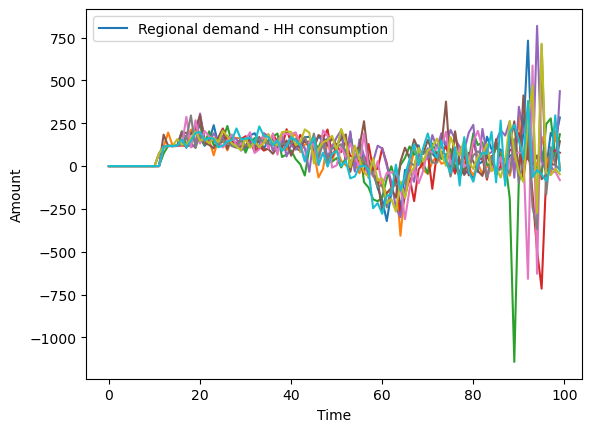

In [7]:
# Check HH consumption equals regional demand
plot_difference(model_vars_df_list, "Regional demand", "HH consumption")
plt.show()

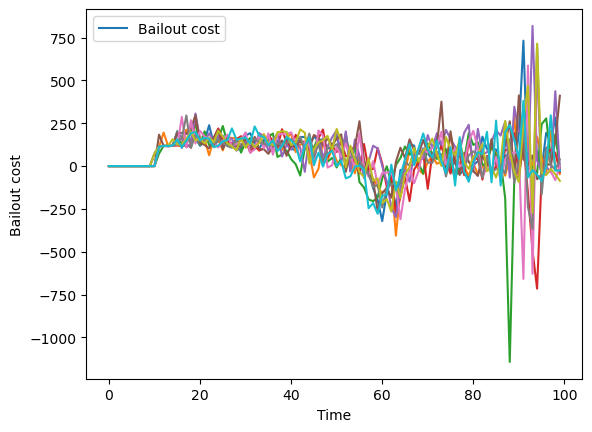

In [8]:
# Plot bailout cost
plot_all_runs(model_vars_df_list, "Bailout cost")
plt.show()

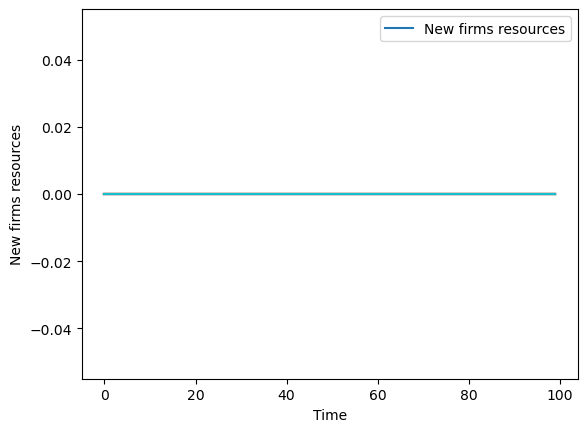

In [9]:
# Plot resources new firms
plot_all_runs(model_vars_df_list, "New firms resources")
plt.show()

#### REAL DEMAND

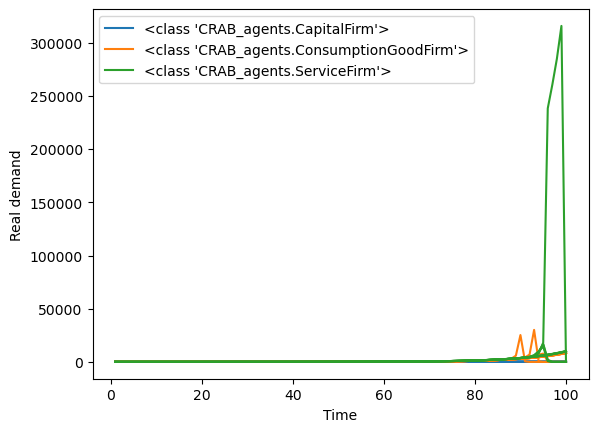

In [10]:
# Plot average demand per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
plt.show()

#### UNEMPLOYMENT RATE

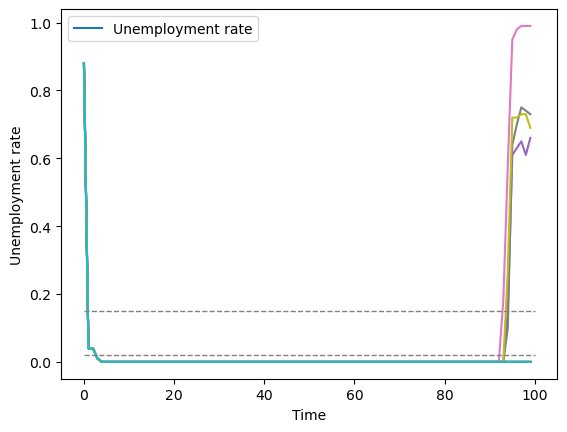

In [11]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.show()

#### LABOR DEMAND

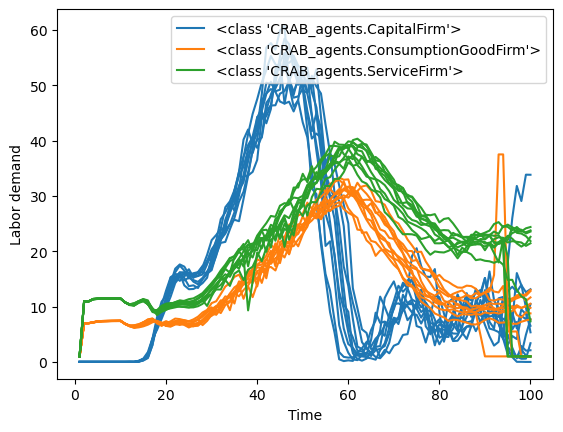

In [12]:
# Plot average labor demand per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

#### SIZE

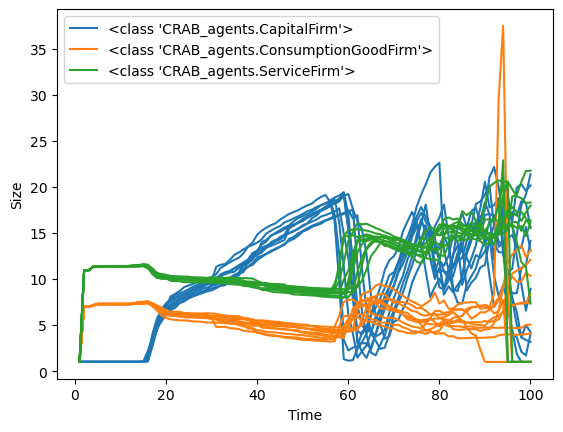

In [13]:
# Plot size (n employers) for all firms
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

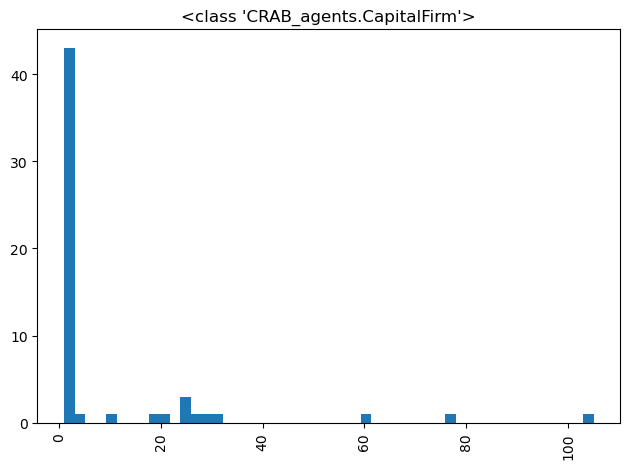

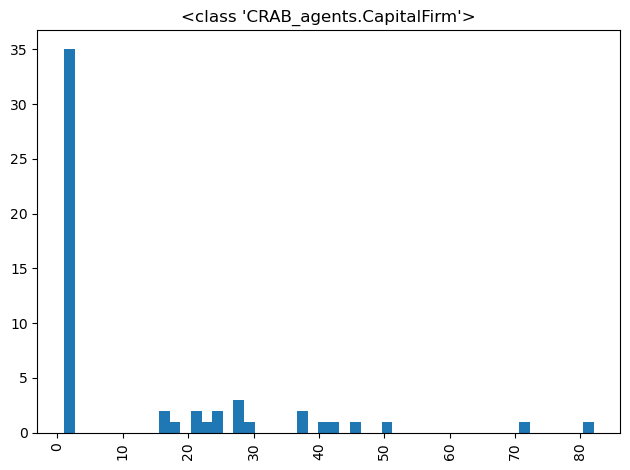

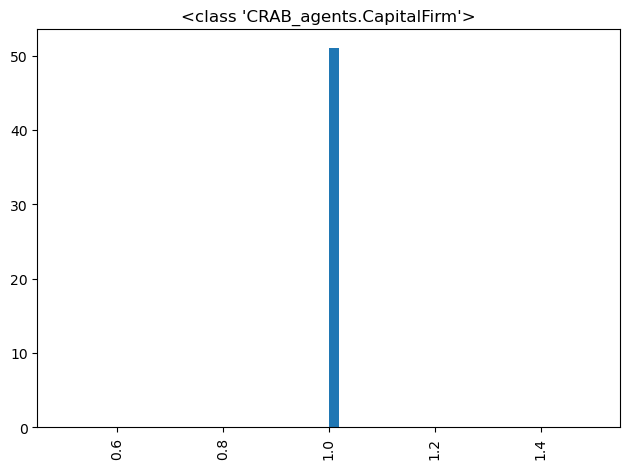

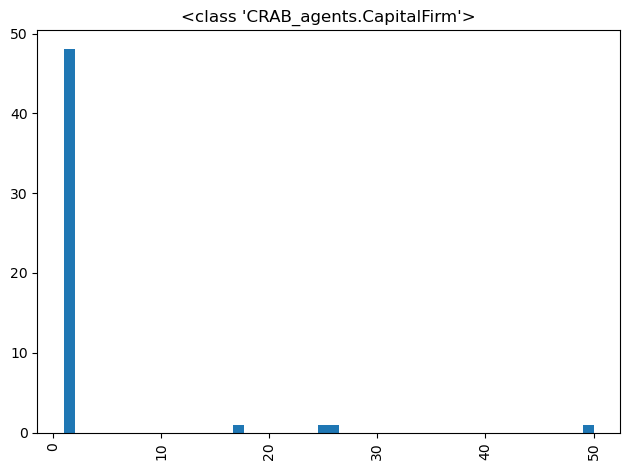

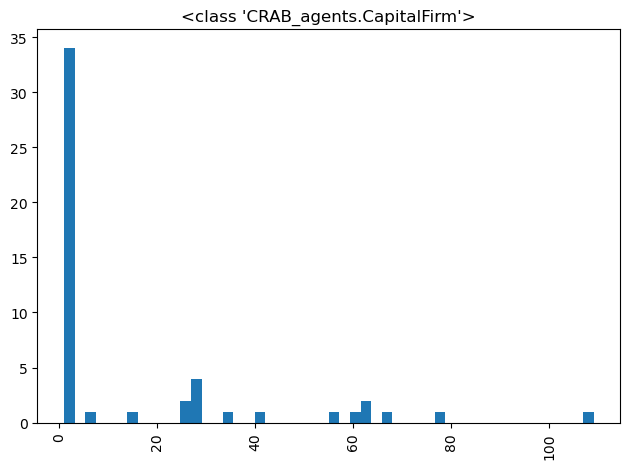

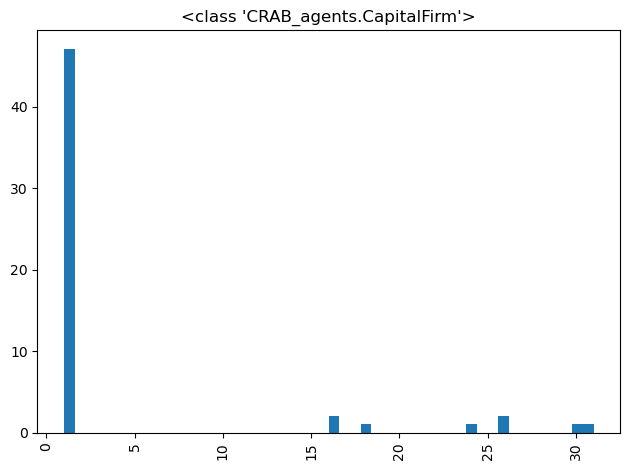

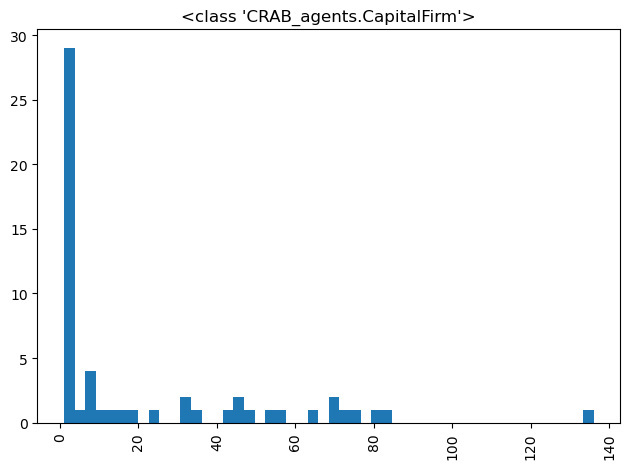

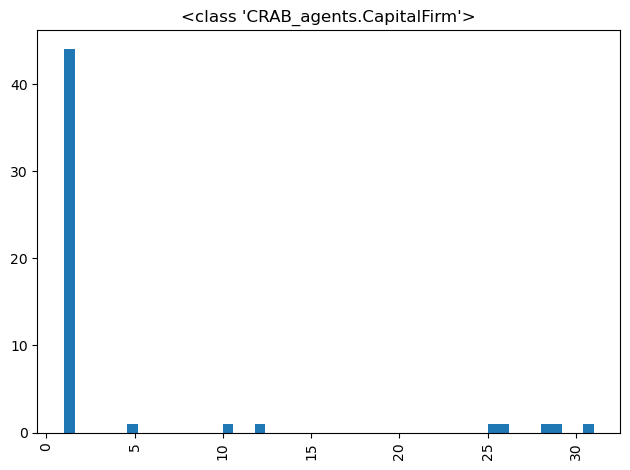

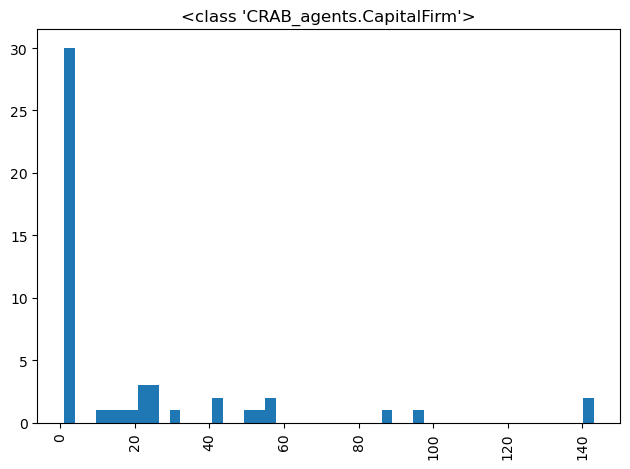

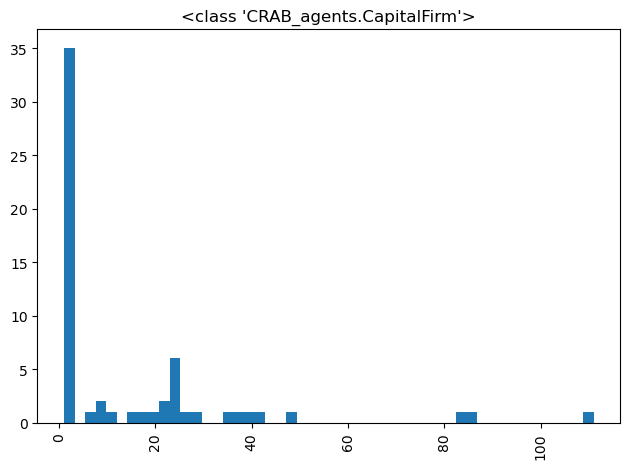

In [14]:
# Plot distribution of firms sizes at end of simulation
for i in range(len(agent_vars_df_list)):
    df = agent_vars_df_list[i]
    df = df[(df["Type"] == "<class 'CRAB_agents.CapitalFirm'>")
            # | (df["Type"] == "<class 'CRAB_agents.ConsumptionGoodFirm'>")
            # | (df["Type"] == "<class 'CRAB_agents.ServiceFirm'>")
           ]
    df[df["Step"] == max(df["Step"])].hist("Size", by="Type", bins=50)
    plt.tight_layout()
    plt.show()

#### MIN and AVERAGE WAGE

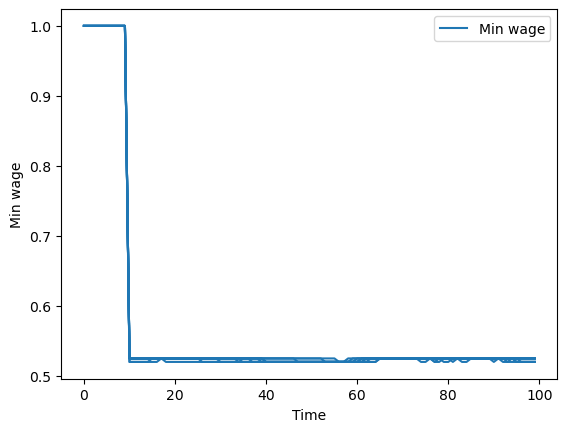

In [15]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

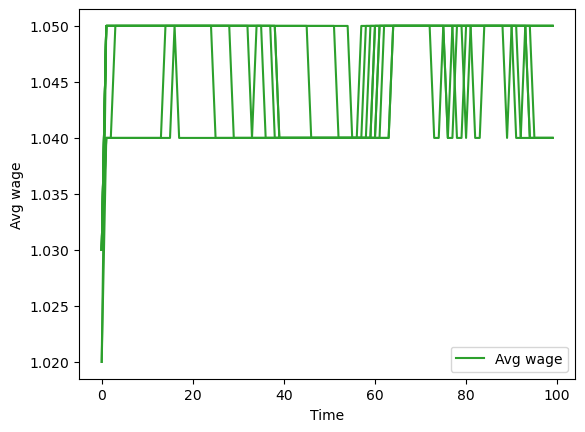

In [16]:
# Plot average wage
plot_all_runs(model_vars_df_list, "Avg wage", color="tab:green")

#### PRICES

In [17]:
# Plot average prices per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

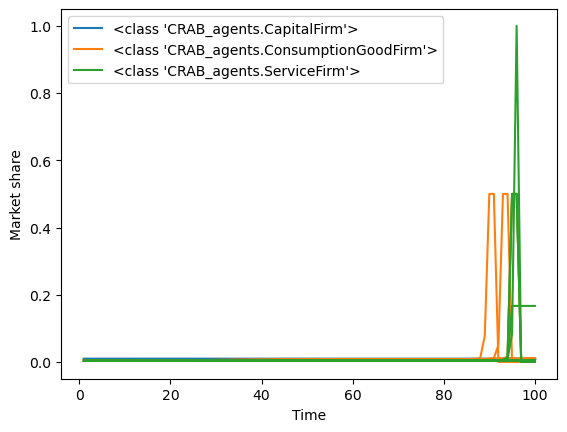

In [18]:
# Plot average market share per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

#### NET WORTH

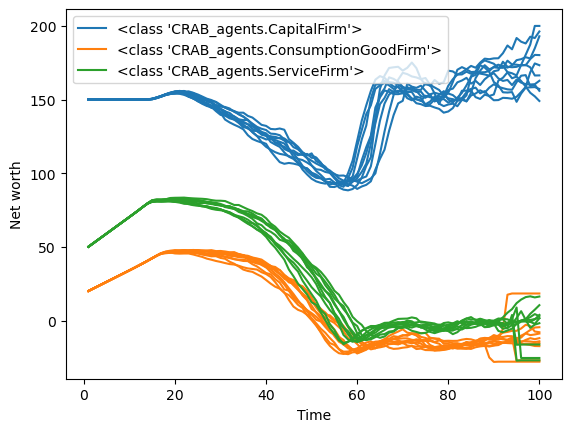

In [19]:
# Plot average net worth per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

In [20]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.show()

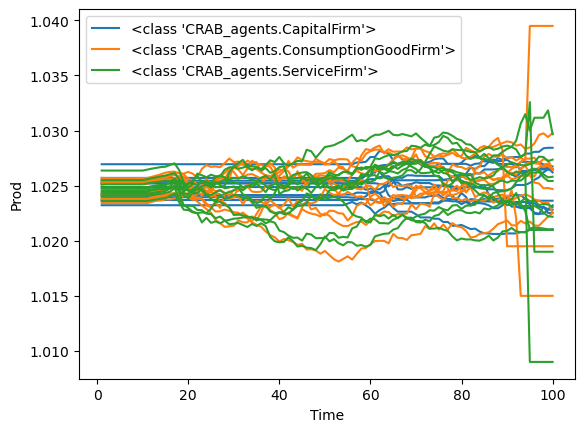

In [21]:
# Plot average productivity per sector
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.show()

In [22]:
# Plot wages
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_per_agent_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()